In [91]:
print('Welcome To Our End To End Machine Learning For Group 03 ')

Welcome To Our End To End Machine Learning For Group 03 


### Student Performance & Learning Style

About Dataset
Student Performance & Learning Style Dataset
About the Dataset
This dataset provides insights into how different study habits, learning styles, and external factors influence student performance. It includes 10,000 records, covering details about students' study hours, online learning participation, exam scores, and other factors impacting academic success.

Dataset Features
1) Student_ID – Unique identifier for each student
2) Age – Student's age (18-30 years)
3) Gender – Male, Female, or Other
4) Study_Hours_per_Week – Hours spent studying per week (5-50 hours)
5) Preferred_Learning_Style – Visual, Auditory, Reading/Writing, Kinesthetic
6) Online_Courses_Completed – Number of online courses completed (0-20)
7) Participation_in_Discussions – Whether the student actively participates in discussions (Yes/No)
8) Assignment_Completion_Rate (%) – Percentage of assignments completed (50%-100%)
9) Exam_Score (%) – Student’s final exam score (40%-100%)
10) Attendance_Rate (%) – Percentage of classes attended (50%-100%)
11) Use_of_Educational_Tech – Whether the student uses educational technology (Yes/No)
12) Self_Reported_Stress_Level – Student’s stress level (Low, Medium, High)
13)Time_Spent_on_Social_Media (hours/week) – Weekly hours spent on social media (0-30 hours)
14) Sleep_Hours_per_Night – Average sleep duration (4-10 hours)
15) Final_Grade – Assigned grade based on exam score (A, B, C, D, F)
Use Cases
Predicting Student Performance – Analyze how different factors influence exam scores.
Educational Insights – Understand the impact of study habits, learning styles, and external activities.
Machine Learning Applications – Train predictive models for student success.

### Column Descriptions

'''Student_ID – A unique identifier assigned to each student.

Age – The age of the student, ranging from 18 to 30 years.

Gender – The gender of the student (Male, Female, or Other).

Study_Hours_per_Week – The total number of hours a student studies per week, ranging from 5 to 50 hours.

Preferred_Learning_Style – The primary learning method a student prefers (Visual, Auditory, Reading/Writing, or Kinesthetic).

Online_Courses_Completed – The number of online courses the student has completed, ranging from 0 to 20.

Participation_in_Discussions – Whether the student actively participates in academic discussions (Yes or No).

Assignment_Completion_Rate (%) – The percentage of assignments completed by the student, ranging from 50% to 100%.

Exam_Score (%) – The student's final exam score, ranging from 40% to 100%.

Attendance_Rate (%) – The percentage of classes attended by the student, ranging from 50% to 100%.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('data/student_performance_large_dataset.csv')

In [26]:
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [27]:
df.shape

(10000, 15)

In [28]:
df.isna().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [31]:
df.describe(include='all')

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
count,10000,10000.000000,10000,10000.000000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000
unique,10000,NaN,3,NaN,4,NaN,2,NaN,NaN,NaN,2,3,NaN,NaN,4
top,S00001,NaN,Female,NaN,Visual,NaN,Yes,NaN,NaN,NaN,Yes,Medium,NaN,NaN,A
freq,1,NaN,4846,NaN,2523,NaN,5996,NaN,NaN,NaN,7022,5015,NaN,NaN,2678
mean,NaN,23.478800,NaN,27.130300,NaN,10.007900,NaN,74.922000,70.188900,75.085100,NaN,NaN,14.936500,6.979300,NaN
std,NaN,3.461986,NaN,13.002547,NaN,6.136726,NaN,14.675437,17.649447,14.749251,NaN,NaN,9.022639,1.996965,NaN
min,NaN,18.000000,NaN,5.000000,NaN,0.000000,NaN,50.000000,40.000000,50.000000,NaN,NaN,0.000000,4.000000,NaN
25%,NaN,20.000000,NaN,16.000000,NaN,5.000000,NaN,62.000000,55.000000,62.000000,NaN,NaN,7.000000,5.000000,NaN
50%,NaN,23.000000,NaN,27.000000,NaN,10.000000,NaN,75.000000,70.000000,75.000000,NaN,NaN,15.000000,7.000000,NaN
75%,NaN,27.000000,NaN,38.000000,NaN,15.000000,NaN,88.000000,85.000000,88.000000,NaN,NaN,23.000000,9.000000,NaN


In [32]:
df.nunique()


Student_ID                                 10000
Age                                           12
Gender                                         3
Study_Hours_per_Week                          45
Preferred_Learning_Style                       4
Online_Courses_Completed                      21
Participation_in_Discussions                   2
Assignment_Completion_Rate (%)                51
Exam_Score (%)                                61
Attendance_Rate (%)                           51
Use_of_Educational_Tech                        2
Self_Reported_Stress_Level                     3
Time_Spent_on_Social_Media (hours/week)       31
Sleep_Hours_per_Night                          7
Final_Grade                                    4
dtype: int64

In [33]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade'],
      dtype='object')

In [34]:
df = df.drop(columns=['Student_ID'])

In [35]:
numerical_df = df.select_dtypes(include=['number'])

### Separate categorical columns
categorical_df = df.select_dtypes(include=['object'])

### Descriptive Analysis

In [36]:
numerical_df

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
0,18,48,14,100,69,66,9,8
1,29,30,20,71,40,57,28,8
2,20,47,11,60,43,79,13,7
3,23,13,0,63,70,60,24,10
4,19,24,19,59,63,93,26,8
...,...,...,...,...,...,...,...,...
9995,20,30,6,62,58,76,17,6
9996,23,16,8,54,84,86,6,5
9997,26,23,3,54,40,70,20,8
9998,18,41,7,66,45,90,6,8


### # Z-Scores

In [37]:
df_zscore = numerical_df.apply(zscore)  # Calculate z-scores for all columns
print("\nZ-Scores:")
df_zscore


Z-Scores:


,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
0,-1.582639,1.605127,0.650559,1.708927,-0.067365,-0.616001,-0.657989,0.511151
1,1.594887,0.220714,1.628328,-0.267263,-1.710558,-1.226232,1.447930,0.511151
2,-1.004907,1.528215,0.161674,-1.016852,-1.540573,0.265444,-0.214638,0.010366
3,-0.138309,-1.086788,-1.630902,-0.812418,-0.010703,-1.022822,1.004579,1.512721
4,-1.293773,-0.240757,1.465366,-1.084996,-0.407336,1.214692,1.226255,0.511151
...,...,...,...,...,...,...,...,...
9995,-1.004907,0.220714,-0.653133,-0.880563,-0.690645,0.062033,0.228714,-0.490419
9996,-0.138309,-0.856052,-0.327210,-1.425719,0.782562,0.740068,-0.990503,-0.991204
9997,0.728289,-0.317669,-1.142018,-1.425719,-1.710558,-0.344787,0.561228,0.511151
9998,-1.582639,1.066744,-0.490172,-0.607985,-1.427249,1.011282,-0.990503,0.511151


### 3.5 Check statistics of data set

In [38]:
### 3.5 Check statistics of data set
df.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [39]:
df.head()

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [40]:
print("Categories in 'Gender' variable:  ",end=" ")
print(df['Gender'].unique())

print("Categories in 'Preferred_Learning_Style' variable:  ",end=" ")
print(df['Preferred_Learning_Style'].unique())

print("Categories in'Self_Reported_Stress_Level' variable:",end=" " )
print(df['Self_Reported_Stress_Level'].unique())

print("Categories in'Use_of_Educational_Tech' variable:",end=" " )
print(df['Use_of_Educational_Tech'].unique())

print("Categories in 'Online_Courses_Completed' variable:     ",end=" " )
print(df['Online_Courses_Completed'].unique())

print("Categories in 'Age' variable:     ",end=" " )
print(df['Age'].unique())

print("Categories in'Study_Hours_per_Week' variable:",end=" " )
print(df['Study_Hours_per_Week'].unique())

print("Categories in'Use_of_Educational_Tech' variable:",end=" " )
print(df['Use_of_Educational_Tech'].unique())



Categories in 'Gender' variable:   ['Female' 'Male' 'Other']
Categories in 'Preferred_Learning_Style' variable:   ['Kinesthetic' 'Reading/Writing' 'Auditory' 'Visual']
Categories in'Self_Reported_Stress_Level' variable: ['High' 'Medium' 'Low']
Categories in'Use_of_Educational_Tech' variable: ['Yes' 'No']
Categories in 'Online_Courses_Completed' variable:      [14 20 11  0 19  5 13 16  7 18  4 17  9  6  3  1 12 10  8  2 15]
Categories in 'Age' variable:      [18 29 20 23 19 28 27 22 25 24 26 21]
Categories in'Study_Hours_per_Week' variable: [48 30 47 13 24 26 49 14 45 35 40 44 10 28 11  8 41 36 38 39 23  6 25 32
 20 12 46 33 21  5 19 31  9 42  7 22 34 43 15 16 29 27 17 37 18]
Categories in'Use_of_Educational_Tech' variable: ['Yes' 'No']


In [41]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']

We have 6 categorical features : ['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions', 'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade']


In [42]:
df.head(2)


,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D


### 3.8 Adding columns for "Total Score" and "Average"

In [43]:
df['total score'] = df['Assignment_Completion_Rate (%)'] + df['Exam_Score (%)'] + df['Attendance_Rate (%)']
df['average'] = df['total score']/3
df.head()

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,total score,average
0,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C,235,78.333333
1,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D,168,56.000000
2,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,182,60.666667
3,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,193,64.333333
4,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,215,71.666667


### Visualizations

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

### Histograms for each column

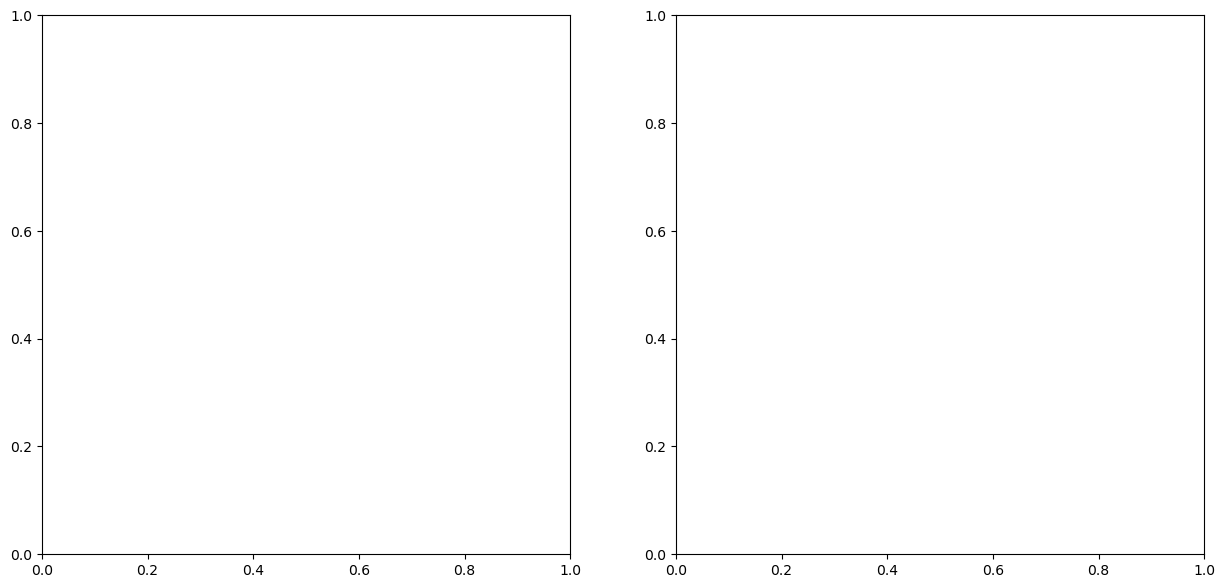

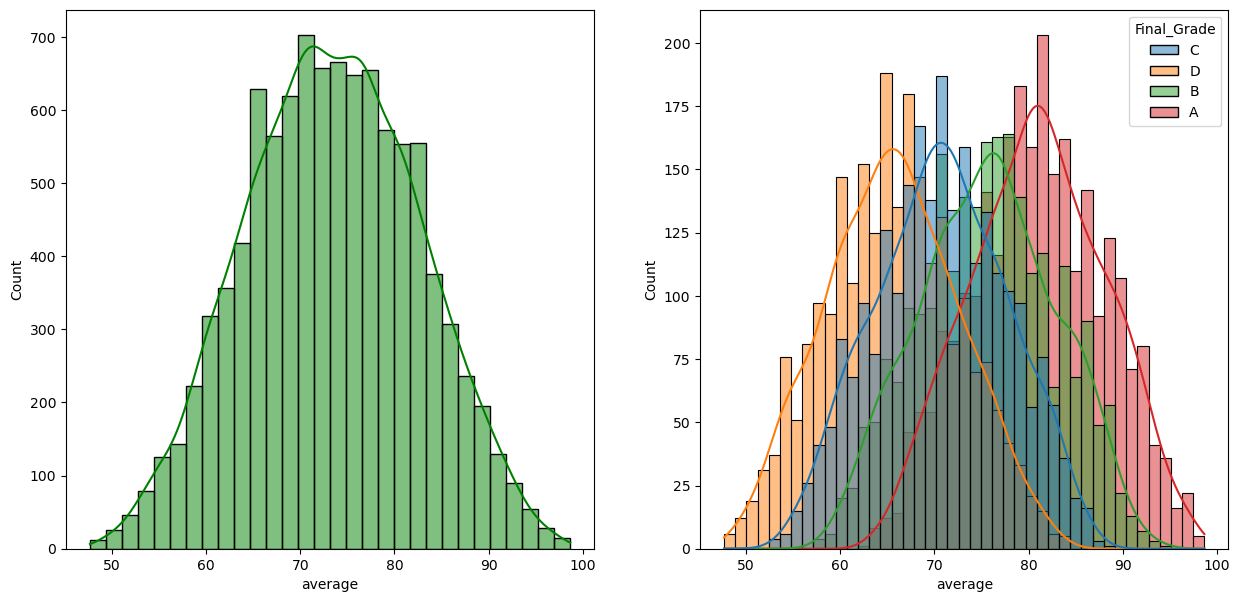

In [45]:

plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='Final_Grade')
plt.show()

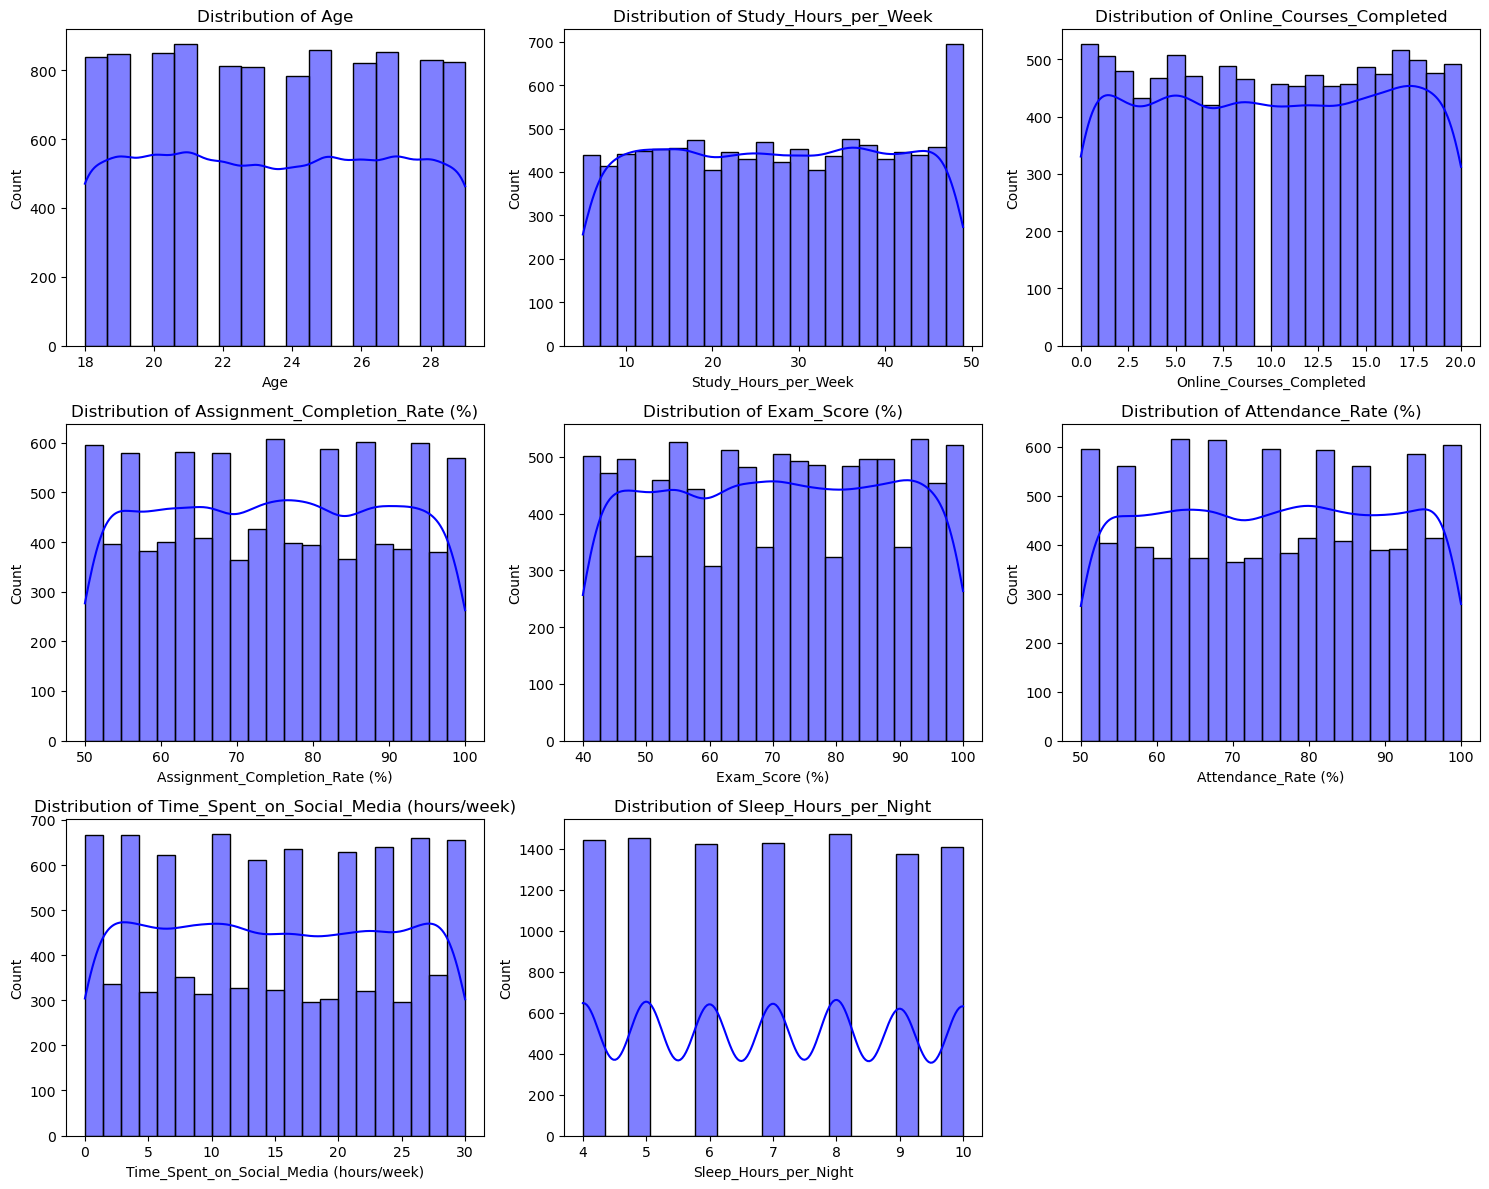

In [46]:
num_cols = len(numerical_df.columns)
rows = int(np.ceil(num_cols / 3))  # Adjust rows dynamically
cols = min(3, num_cols)  # Maximum 3 columns

plt.figure(figsize=(5 * cols, 4 * rows))  # Adjust figure size

# Histograms for each column
for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(numerical_df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()  # Prevent overlap

plt.show()

### Boxplots for each column

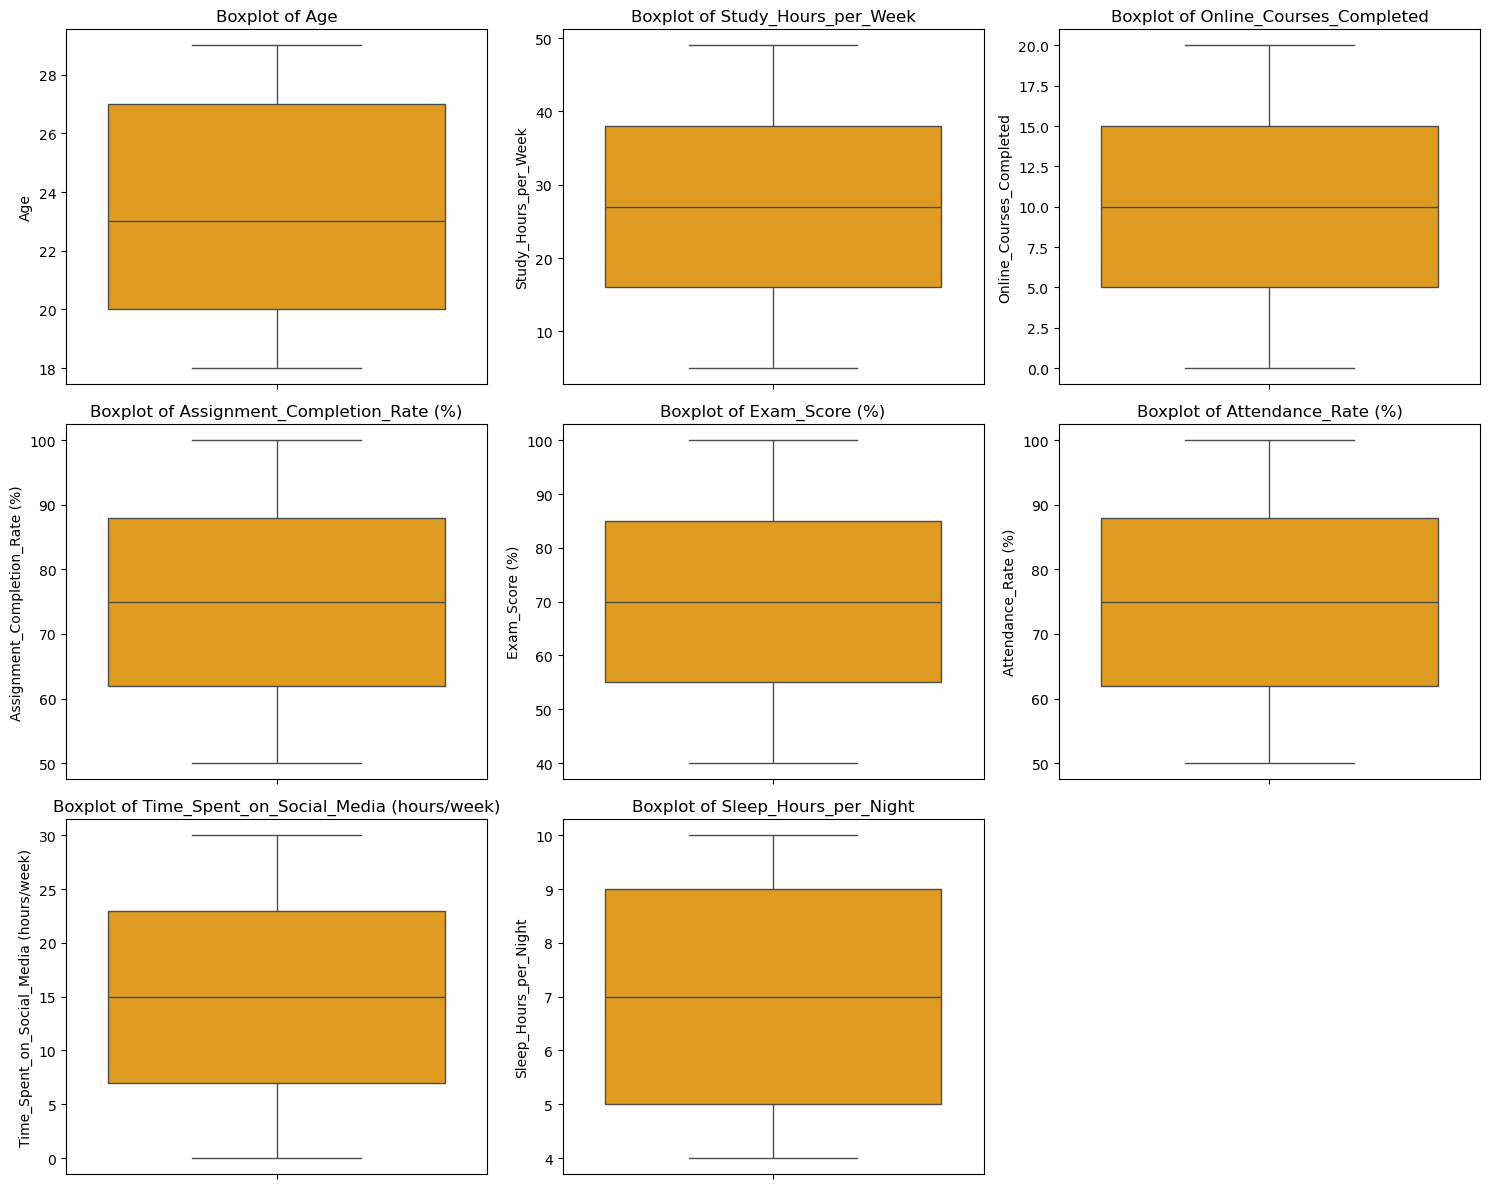

In [47]:

num_cols = len(numerical_df.columns)
rows = int(np.ceil(num_cols / 3))  # Dynamically calculate the number of rows
cols = min(3, num_cols)  # Ensure we don't exceed 3 columns

plt.figure(figsize=(5 * cols, 4 * rows))  # Adjust figure size dynamically

for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(rows, cols, i)  # Use dynamic rows & cols
    sns.boxplot(y=numerical_df[column], color='orange')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Prevent overlap

plt.show()

### Compute correlation matrix

In [48]:

correlation_table = numerical_df.corr()  # Pearson (default)
# correlation_table = df.corr(method='spearman')  # Spearman rank correlation

print("Correlation Table:")
print(correlation_table)

Correlation Table:
                                              Age  Study_Hours_per_Week  \
Age                                      1.000000             -0.002108   
Study_Hours_per_Week                    -0.002108              1.000000   
Online_Courses_Completed                -0.004895              0.025951   
Assignment_Completion_Rate (%)          -0.006275              0.000894   
Exam_Score (%)                           0.001693              0.004084   
Attendance_Rate (%)                     -0.014050              0.007768   
Time_Spent_on_Social_Media (hours/week)  0.012660              0.010380   
Sleep_Hours_per_Night                    0.012052              0.010908   

                                         Online_Courses_Completed  \
Age                                                     -0.004895   
Study_Hours_per_Week                                     0.025951   
Online_Courses_Completed                                 1.000000   
Assignment_Completion_Rate (%

### Training A Model

In [72]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import warnings

### Preparing X and Y variables

In [60]:
X = df.drop(columns=['Exam_Score (%)'],axis=1)

In [61]:
X.head()

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,total score,average
0,18,Female,48,Kinesthetic,14,Yes,100,66,Yes,High,9,8,C,235,78.333333
1,29,Female,30,Reading/Writing,20,No,71,57,Yes,Medium,28,8,D,168,56.000000
2,20,Female,47,Kinesthetic,11,No,60,79,Yes,Low,13,7,D,182,60.666667
3,23,Female,13,Auditory,0,Yes,63,60,Yes,Low,24,10,B,193,64.333333
4,19,Female,24,Auditory,19,Yes,59,93,Yes,Medium,26,8,C,215,71.666667


In [58]:
y = df['Exam_Score (%)']

In [59]:
y

0       69
1       40
2       43
3       70
4       63
        ..
9995    58
9996    84
9997    40
9998    45
9999    40
Name: Exam_Score (%), Length: 10000, dtype: int64

### Create Column Transformer with 3 types of transformers

In [62]:

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [63]:
X = preprocessor.fit_transform(X)

In [64]:
X.shape

(10000, 27)

### separate dataset into train and test

In [65]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8000, 27), (2000, 27))

### Create an Evaluate Function to give all metrics after model Training

In [66]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [68]:
pip install xgboost



  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)


In [73]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 3.5694
- Mean Absolute Error: 3.0270
- R2 Score: 0.9591
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.6161
- Mean Absolute Error: 3.0831
- R2 Score: 0.9580


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0226
- Mean Absolute Error: 0.0195
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0224
- Mean Absolute Error: 0.0192
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.3605
- Mean Absolute Error: 3.5200
- R2 Score: 0.9389
-----------------------

### RESULTS

In [74]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999998
7,CatBoosting Regressor,0.996947
6,XGBRegressor,0.993793
5,Random Forest Regressor,0.983366
4,Decision Tree,0.962207
1,Lasso,0.958049
8,AdaBoost Regressor,0.939266
3,K-Neighbors Regressor,0.906949


## Linear Regression

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Plot y_pred and y_test

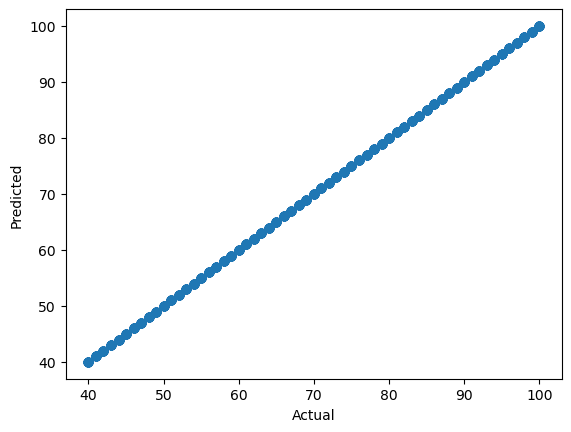

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

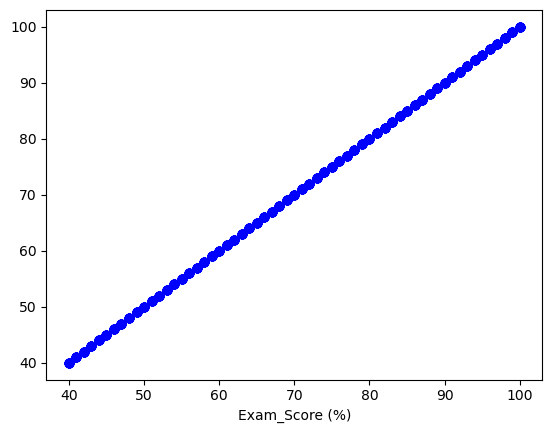

In [84]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue')
plt.show()

### Difference between Actual and Predicted Values

In [86]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6252,94,94.0,1.421085e-14
4684,46,46.0,-7.105427e-14
1731,56,56.0,-7.105427e-15
4742,81,81.0,1.421085e-14
4521,68,68.0,-1.421085e-14
...,...,...,...
6412,98,98.0,4.263256e-14
8285,82,82.0,0.000000e+00
7853,89,89.0,2.842171e-14
1095,96,96.0,2.842171e-14


### Random Forest Regressor

In [87]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate R² score
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the Random Forest model is %.2f" % score)

Accuracy of the Random Forest model is 98.33


## Plot y_pred and y_test

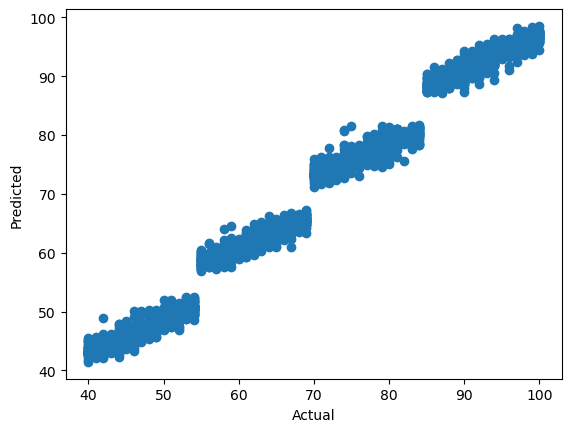

In [88]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

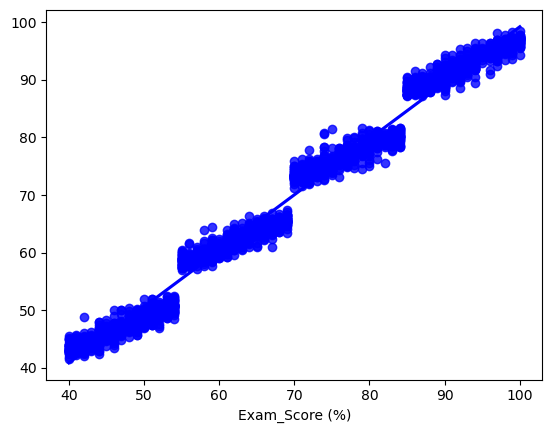

In [89]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue')
plt.show()

### Difference between Actual and Predicted Values

In [90]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6252,94,92.51,1.49
4684,46,45.72,0.28
1731,56,58.97,-2.97
4742,81,79.35,1.65
4521,68,63.58,4.42
...,...,...,...
6412,98,96.27,1.73
8285,82,80.04,1.96
7853,89,89.08,-0.08
1095,96,93.29,2.71


### Machine Learning Model: Decision Tree

In [52]:
X= df.drop(columns=['Final_Grade'],axis = 1)
y = df['Final_Grade']
encoder = LabelEncoder()
categorical_col = X.select_dtypes(include=['object']).columns.tolist()
for col in categorical_col:
    X[col] = encoder.fit_transform(X[col])

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 2: Train and visualize the decision tree

In [53]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Step 3: Evaluate

In [54]:

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 1.00


### Visualize the tree

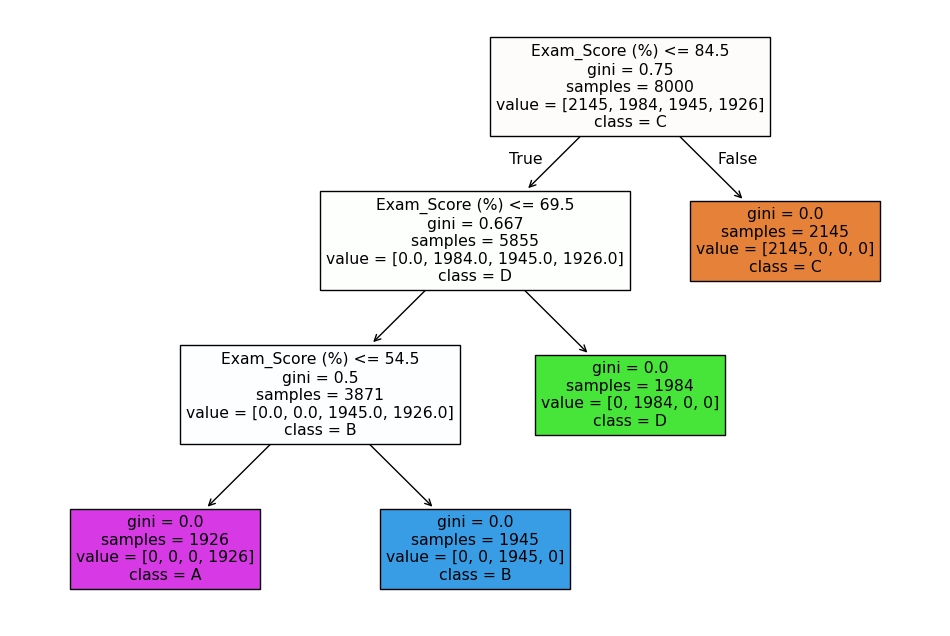

In [55]:

# Ensure class_names matches unique classes in y
class_labels = list(map(str, y.unique()))  # Convert class labels to strings

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=class_labels)
plt.show()
